In [30]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *

# Определение коэффициентов передаточной функции
# Уравнение: y'' + 4y' + 6y = -u' - 2u

# Коэффициенты характеристического уравнения
num = [-1, -2]  # Коэффициенты для u'(t) и u(t)
den = [1, 4, 6]  # Коэффициенты для y''(t), y'(t) и y(t)
w = tf(num,den)

print('Передаточная функция САУ : \n %s'%w)
print("Полюса: \n %s"%pole(w))
print("Нули:\n %s -\n "%zero(w))

# Переход к описанию в пространстве состояний
sys_ss = ctrl.ss(w)
A, B, C, D = sys_ss.A, sys_ss.B, sys_ss.C, sys_ss.D
print("Описание в пространстве состояний:")
print("A =", A)
print("B =", B)
print("C =", C)
print("D =", D)


Передаточная функция САУ : 
 <TransferFunction>: sys[25]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   -s - 2
-------------
s^2 + 4 s + 6

Полюса: 
 [-2.+1.41421356j -2.-1.41421356j]
Нули:
 [-2.+0.j] -
 
Описание в пространстве состояний:
A = [[-4. -6.]
 [ 1.  0.]]
B = [[1.]
 [0.]]
C = [[-1. -2.]]
D = [[0.]]


полюса отрицательные - система устойчива
Нуль с отрицательной вещественной частью может вызвать демпфирование в переходном процессе, ускоряя его.
Нуль с отрицательной вещественной частью может уменьшить резонансные пики

Переходная характеристика (Step Response):

Цель: Оценка реакции системы на ступенчатое изменение входного сигнала.
Зачем применять: Помогает понять устойчивость, время установления и перерегулирование системы.

In [46]:
# Проверка управляемости
controllability_matrix = ctrb(sys_ss.A, sys_ss.B)
rank_controllability = np.linalg.matrix_rank(controllability_matrix)
is_controllable = rank_controllability == sys_ss.A.shape[0]

# Проверка наблюдаемости
observability_matrix = obsv(sys_ss.A, sys_ss.C)
rank_observability = np.linalg.matrix_rank(observability_matrix)
is_observable = rank_observability == sys_ss.A.shape[0]

# Вывод результатов
print("Матрица управляемости:")
print(controllability_matrix)
print(f"Ранг матрицы управляемости: {rank_controllability}")
print(f"Система управляемая: {is_controllable}")

print("\nМатрица наблюдаемости:")
print(observability_matrix)
print(f"Ранг матрицы наблюдаемости: {rank_observability}")
print(f"Система наблюдаемая: {is_observable}")


Матрица управляемости:
[[ 1. -4.]
 [ 0.  1.]]
Ранг матрицы управляемости: 2
Система управляемая: True

Матрица наблюдаемости:
[[-1. -2.]
 [ 2.  6.]]
Ранг матрицы наблюдаемости: 2
Система наблюдаемая: True


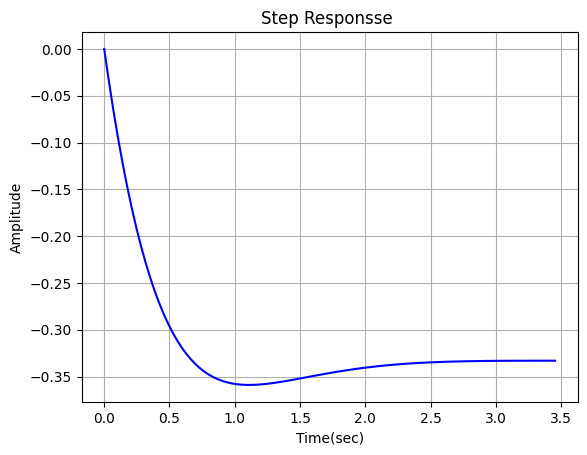

In [31]:
# Переходная функция
y,x=step(w)
plt.plot(x,y,"b")
plt.title('Step Responsse ')
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

Импульсная характеристика (Impulse Response):

Цель: Оценка реакции системы на импульсный входной сигнал.
Зачем применять: Полезна для анализа мгновенного поведения системы.

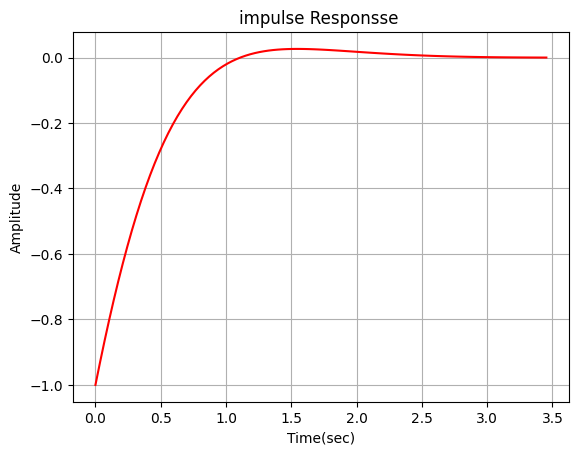

In [32]:
# Импульсная переходная функция
y,x=impulse(w)
plt.plot(x,y,"r")
plt.title('impulse Responsse ')
plt.ylabel('Amplitude')
plt.xlabel('Time(sec)')
plt.grid(True)
plt.show()

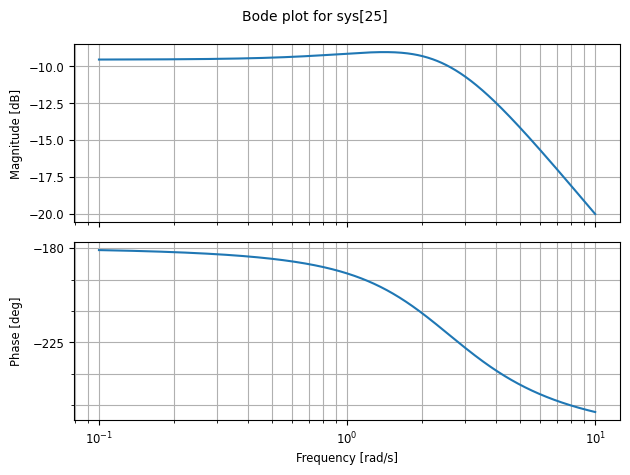

In [33]:
# Диаграмма Боде
mag, phase, omega = bode(w, dB=True)
plt.plot()
plt.show()

Частотные характеристики (Bode Plot):

Цель: Оценка амплитудно-частотной и фазочастотной характеристик системы.
Зачем применять: Анализ устойчивости и частотных свойств системы.

Амплитудно-частотная характеристика показывает, что система имеет область с уменьшением усиления на высоких частотах, что является признаком фильтрации высоких частот.
Фазочастотная характеристика показывает сдвиг фазы, который начинается с -180° и уменьшается по мере увеличения частоты, что типично для систем с интегрирующим поведением.

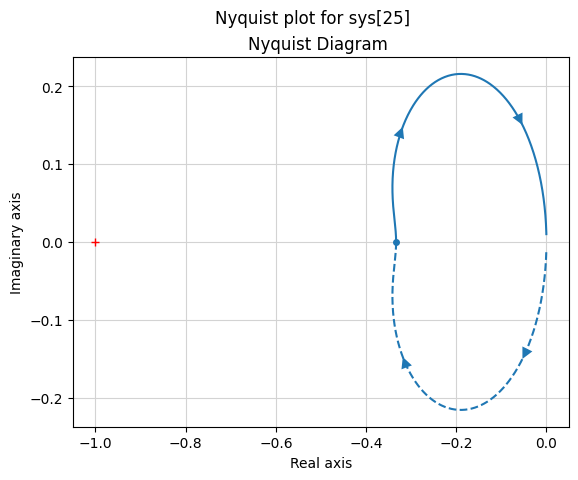

In [34]:
# Частотный годограф Найквиста
plt.title('Nyquist Diagram ')
plt.ylabel('Imaginary Axis')
plt.xlabel('Real Axis')
nyquist(w)
plt.grid(True)
plt.plot()
plt.show()

График Найквиста (Nyquist Plot):

Цель: Анализ устойчивости в частотной области.
Разрыв: Вероятно, что система устойчива, но разрыв требует дополнительного анализа для полной уверенности.

Непрерывная модель: 
<StateSpace>: sys[43]
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.  1.]
     [-6. -4.]]

B = [[ 0.]
     [-2.]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]

Полюса: 
[-2.+1.41421356j -2.-1.41421356j]


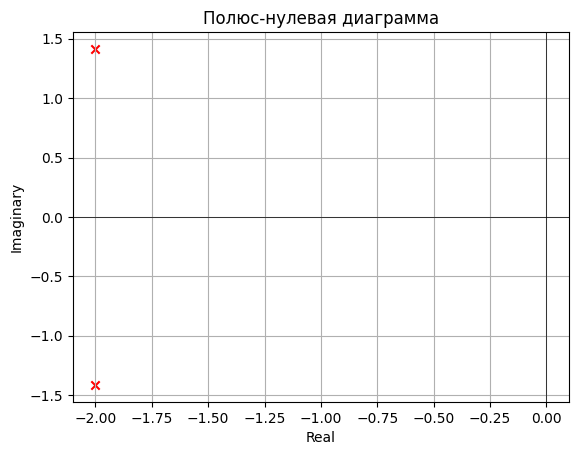

[0.         0.03488765 0.06977531 0.10466296 0.13955061 0.17443826
 0.20932592 0.24421357 0.27910122 0.31398888 0.34887653 0.38376418
 0.41865184 0.45353949 0.48842714 0.52331479 0.55820245 0.5930901
 0.62797775 0.66286541 0.69775306 0.73264071 0.76752836 0.80241602
 0.83730367 0.87219132 0.90707898 0.94196663 0.97685428 1.01174193
 1.04662959 1.08151724 1.11640489 1.15129255 1.1861802  1.22106785
 1.25595551 1.29084316 1.32573081 1.36061846 1.39550612 1.43039377
 1.46528142 1.50016908 1.53505673 1.56994438 1.60483203 1.63971969
 1.67460734 1.70949499 1.74438265 1.7792703  1.81415795 1.8490456
 1.88393326 1.91882091 1.95370856 1.98859622 2.02348387 2.05837152
 2.09325918 2.12814683 2.16303448 2.19792213 2.23280979 2.26769744
 2.30258509 2.33747275 2.3723604  2.40724805 2.4421357  2.47702336
 2.51191101 2.54679866 2.58168632 2.61657397 2.65146162 2.68634928
 2.72123693 2.75612458 2.79101223 2.82589989 2.86078754 2.89567519
 2.93056285 2.9654505  3.00033815 3.0352258  3.07011346 3.105001

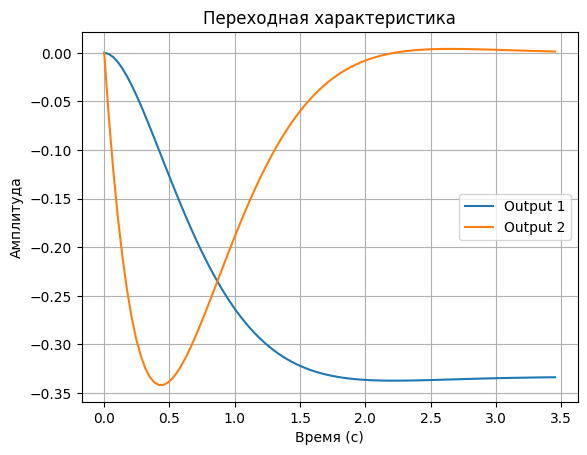

Дискретная модель: 
<StateSpace>: sys[43]$sampled
Inputs (1): ['u[0]']
Outputs (2): ['y[0]', 'y[1]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.97375796  0.08160044]
     [-0.48960263  0.64735621]]

B = [[-0.00874735]
     [-0.16320088]]

C = [[1. 0.]
     [0. 1.]]

D = [[0.]
     [0.]]

dt = 0.1

Полюса дискретной модели: 
[0.81055708+0.11540045j 0.81055708-0.11540045j]
Система устойчива


In [41]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Определение матриц состояния
A = np.array([[0, 1], [-6, -4]])
B = np.array([[0], [-2]])
C = np.eye(2)  # Для наблюдения всех состояний
D = np.zeros((2, 1))

# Создание системы состояния
system = ctrl.ss(A, B, C, D)
print("Непрерывная модель: \n{}".format(system))

# Нахождение полюсов системы
poles = system.poles()
print("Полюса: \n{}".format(poles))

# Визуализация полюсов
plt.figure()
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='red')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.title('Полюс-нулевая диаграмма')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

# Переходная характеристика для каждого выхода
t, y = ctrl.step_response(system)
print(t,y)
plt.plot(t, y[0][0], label='Output 1')
plt.plot(t, y[1][0], label='Output 2')
plt.title('Переходная характеристика')
plt.ylabel('Амплитуда')
plt.xlabel('Время (с)')
plt.legend()
plt.grid(True)
plt.show()

# Дискретизация системы
h = 0.1
sd = ctrl.c2d(system, h, method='zoh')
print("Дискретная модель: \n{}".format(sd))
print("Полюса дискретной модели: \n{}".format(sd.poles()))

# Проверка устойчивости дискретной системы
stable = all(abs(p) < 1 for p in sd.poles())
print("Система устойчива" if stable else "Система неустойчива")

ValueError: too many values to unpack (expected 2)

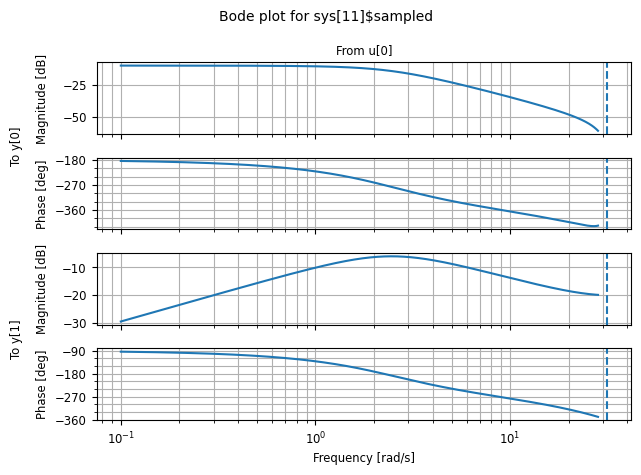

In [7]:
# Bode Plot для дискретной системы
mag, phase = ctrl.bode(sd)
plt.figure()
plt.subplot(211)
plt.semilogx(omega, mag)
plt.title('Bode Plot (Дискретная система)')
plt.ylabel('Magnitude (dB)')
plt.subplot(212)
plt.semilogx(omega, phase)
plt.ylabel('Phase (degrees)')
plt.xlabel('Frequency (rad/s)')
plt.show()

SISO дискретная модель: 
<StateSpace>: sys[50]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[ 0.97375796  0.08160044]
     [-0.48960263  0.64735621]]

B = [[-0.00874735]
     [-0.16320088]]

C = [[1. 0.]]

D = [[0.]]

dt = 0.1



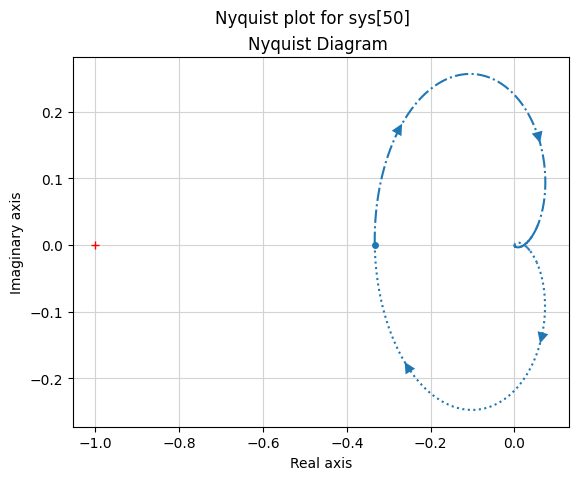

In [44]:
siso_system = ctrl.ss(sd.A, sd.B[:, 0], sd.C[0, :], sd.D[0, 0], sd.dt)
print("SISO дискретная модель: \n{}".format(siso_system))
# Частотный годограф Найквиста
plt.title('Nyquist Diagram ')
plt.ylabel('Imaginary Axis')
plt.xlabel('Real Axis')
nyquist(siso_system)
plt.grid(True)
plt.plot()
plt.show()

Все классно, теперь имеем замкнутый граф найквиста - увеличили устойчивость системы на старте

Полюсы дискретной системы: [0.81055708+0.11540045j 0.81055708-0.11540045j]
Дискретная система устойчива: True


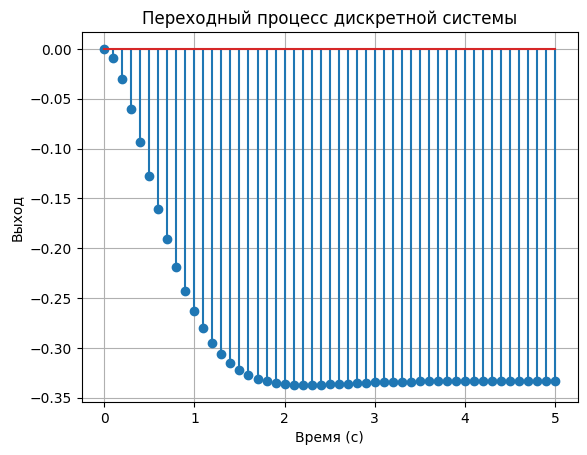

In [73]:
# Преобразование дискретной передаточной функции в состояние
Gd_ss = siso_system
T_s = 0.1

# Оценка устойчивости дискретной системы
poles_d = np.linalg.eigvals(Gd_ss.A)
print("Полюсы дискретной системы:", poles_d)
print("Дискретная система устойчива:", np.all(np.abs(poles_d) < 1))
t, y = ctrl.step_response(Gd_ss)
# Переходный процесс дискретной системы
plt.stem(t, y)
plt.title('Переходный процесс дискретной системы')
plt.xlabel('Время (с)')
plt.ylabel('Выход')
plt.grid()
plt.show()

In [48]:
yout